Exercises from Chapter 3

## 1. Build a classifier with >97% accuracy

In [48]:
# Download the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [49]:
import numpy as np
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy().astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
# Evaluate baseline model
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(knn_clf, X_train, y_train, cv = 3)
f1_score(y_train, y_pred, average = "macro")

0.9672164755274896

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.9676 , 0.9671 , 0.96755])

In [ ]:
# Now let's try to improve that accuracy by tuning the hyperparameters
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf,
                          param_grid =
                          {
                              "weights": ("uniform", "distance"),
                              "n_neighbors": (2, 3, 4, 5, 6)
                          },
                          scoring = "accuracy",
                          cv = 3)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
grid_search.best_score_

0.9703500000000002

In [ ]:
best_mnist = grid_search.best_estimator_

## 2. Augment MNIST by shifting images and retrain

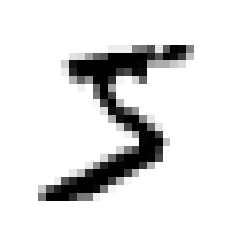

In [ ]:
from scipy.ndimage.interpolation import shift
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

def augment_image(image):
    image = image.reshape(28, 28)
    up_shift = shift(image, [-1, 0]).reshape(784)
    down_shift = shift(image, [1, 0]).reshape(784)
    left_shift = shift(image, [0, -1]).reshape(784)
    right_shift = shift(image, [0, 1]).reshape(784)

    return [image.reshape(784), up_shift, down_shift, left_shift, right_shift]

augmented = augment_image(X_train[0])
plot_digit(augmented[0])

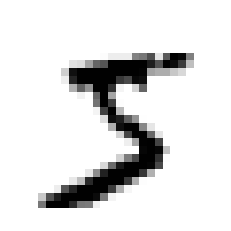

In [ ]:
plot_digit(augmented[2])

In [ ]:
# Now we've tested our function, let's use it
X_train_augmented = []
y_train_augmented = []
for i in range(len(X_train)):
    X_train_augmented += augment_image(X_train[i])
    y_train_augmented += [y_train[i], y_train[i], y_train[i], y_train[i], y_train[i]]
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
print(X_train_augmented[:6])
print(X_train_augmented.shape)
print(y_train_augmented[:6])
print(y_train_augmented.shape)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.39100096e-21  1.91220035e-21  6.58018215e-23 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.54991573e-22
  -1.42546009e-22 -1.89040327e-23]
 [ 4.82197050e-22 -2.07588054e-21 -4.46065190e-21 ... -3.25453376e-23
  -1.89660406e-24  0.00000000e+00]
 [ 0.00000000e+00 -6.46659022e-23  4.82197050e-22 ...  4.24058361e-22
   2.51191963e-22 -3.25453376e-23]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(300000, 784)
[5 5 5 5 5 0]
(300000,)


In [ ]:
# Retrain model and observe performance
knn_clf_augmented = KNeighborsClassifier(n_neighbors = 4, weights = "distance")

In [ ]:
knn_clf_augmented.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
from sklearn.metrics import accuracy_score
y_test_pred = knn_clf_augmented.predict(X_test)

In [ ]:
accuracy_score(y_test, y_test_pred)

0.9763

In [ ]:
# VS our model trained on 60K images
y_test_pred = knn_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_test_pred)

0.9688

## 3. The titanic Kaggle challenge
https://www.kaggle.com/c/titanic/

### Data ingest

In [162]:
import pandas as pd
import os

dataset_path = os.path.join("../", "datasets", "titanic")
train = pd.read_csv(os.path.join(dataset_path, "train.csv"))
test = pd.read_csv(os.path.join(dataset_path, "test.csv"))
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data exploration

In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
# Let's first convert the sex column to be numerical
train["sex"] = 0
train.loc[train["Sex"] == "female", "sex"] = 1
train.drop("Sex", axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0


In [165]:
# We'll do the same with embarked
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [166]:
train["embarked"] = 0
train.loc[train["Embarked"] == "C", "embarked"] = 1
train.loc[train["Embarked"] == "Q", "embarked"] = 2
train.drop("Embarked", axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,sex,embarked
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0


In [167]:
# Then we'll remove unrelated columns
train.drop(["Ticket", "Name", "Cabin"], axis = 1, inplace = True)

In [168]:
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending = False)

Survived       1.000000
sex            0.543351
Fare           0.257307
embarked       0.106811
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Our most correlating features are sex, fare, age and ticket class - let's try combining some of the lesser features

In [169]:
train["relatives_aboard"] = train["Parch"] + train["SibSp"]
train["location_class"] = train["embarked"]*10 + train["Pclass"]

In [170]:
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending = False)

Survived            1.000000
sex                 0.543351
Fare                0.257307
embarked            0.106811
Parch               0.081629
location_class      0.061399
relatives_aboard    0.016639
PassengerId        -0.005007
SibSp              -0.035322
Age                -0.077221
Pclass             -0.338481
Name: Survived, dtype: float64

In [171]:
# Remove irrelevant columns
train.drop(["Parch", "relatives_aboard", "location_class"], axis = 1, inplace = True)

In [172]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Fare,sex,embarked
0,1,0,3,22.0,1,7.2500,0,0
1,2,1,1,38.0,1,71.2833,1,1
2,3,1,3,26.0,0,7.9250,1,0
3,4,1,1,35.0,1,53.1000,1,0
4,5,0,3,35.0,0,8.0500,0,0


### Splitting into X and Y

In [173]:
X_train = train.drop("Survived", axis = 1)
X_train.head()

,PassengerId,Pclass,Age,SibSp,Fare,sex,embarked
0,1,3,22.0,1,7.2500,0,0
1,2,1,38.0,1,71.2833,1,1
2,3,3,26.0,0,7.9250,1,0
3,4,1,35.0,1,53.1000,1,0
4,5,3,35.0,0,8.0500,0,0


In [174]:
y_train = train["Survived"].astype(np.uint8)
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: uint8

### Prep data for ML algorithms

In [175]:
# Remove passenger ID
X_train.drop("PassengerId", axis = 1, inplace = True)

In [176]:
X_train.dtypes

Pclass        int64
Age         float64
SibSp         int64
Fare        float64
sex           int64
embarked      int64
dtype: object

In [177]:
# Normalise ages and fares
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [181]:
# Impute nulls in age column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
imputer.fit(X_train)
X_train = imputer.transform(X_train)

### Train models

In [182]:
from sklearn.neighbors import KNeighborsClassifier

knn_titanic = KNeighborsClassifier()
knn_titanic.fit(X_train, y_train)

KNeighborsClassifier()

In [183]:
from sklearn.model_selection import GridSearchCV

knn_grid_search = GridSearchCV(knn_titanic,
                              param_grid = 
                              {
                                "weights": ("uniform", "distance"),
                                "n_neighbors": (3, 4, 5, 6)
                              },
                              cv = 3,
                              scoring = "accuracy")
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (3, 4, 5, 6),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [184]:
knn_grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=6)

In [185]:
knn_grid_search.best_score_

0.7923681257014591

In [192]:
from sklearn.ensemble import RandomForestClassifier

titanic_forest = RandomForestClassifier()
titanic_forest.fit(X_train, y_train)

forest_grid_search = GridSearchCV(titanic_forest,
                              param_grid = 
                              {
                                "criterion": ("gini", "entropy"),
                                "n_estimators": (10, 50, 100, 200),
                                "min_samples_leaf": (1, 2, 3, 5)
                              },
                              cv = 3,
                              scoring = "accuracy")
forest_grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'min_samples_leaf': (1, 2, 3, 5),
                         'n_estimators': (10, 50, 100, 200)},
             scoring='accuracy')

In [193]:
forest_grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       n_estimators=200)

In [194]:
forest_grid_search.best_score_

0.8294051627384961

In [197]:
from sklearn.linear_model import SGDClassifier

titanic_sgd = SGDClassifier()
titanic_sgd.fit(X_train, y_train)

sgd_grid_search = GridSearchCV(titanic_sgd,
                              param_grid = 
                              {
                                "alpha": (0.0001, 0.0005, 0.001, 0.01),
                                "early_stopping": (True, False)
                              },
                              cv = 3,
                              scoring = "accuracy")
sgd_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'alpha': (0.0001, 0.0005, 0.001, 0.01),
                         'early_stopping': (True, False)},
             scoring='accuracy')

In [198]:
sgd_grid_search.best_estimator_

SGDClassifier(alpha=0.0005)

In [199]:
sgd_grid_search.best_score_

0.7946127946127947

Seems like the Random Forest Classifier is the best

### Create data transformation pipeline

In [211]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextColumnTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self # Nothing else to do
    def transform(self, X, y = None):
        # Let's first convert the sex column to be numerical
        X["sex"] = 0
        X.loc[X["Sex"] == "female", "sex"] = 1
        X.drop("Sex", axis = 1, inplace = True)

        X["embarked"] = 0
        X.loc[X["Embarked"] == "C", "embarked"] = 1
        X.loc[X["Embarked"] == "Q", "embarked"] = 2
        X.drop("Embarked", axis = 1, inplace = True)
        
        return X

class ColumnRemovalTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self # Nothing else to do
    def transform(self, X, y = None):
        # Then we'll remove unrelated columns
        X.drop(["Ticket", "Name", "Cabin", "Parch"], axis = 1, inplace = True)
        # Remove passenger ID
        X.drop("PassengerId", axis = 1, inplace = True)

        return X


In [213]:
from sklearn.pipeline import Pipeline

titanic_pipeline = Pipeline([
    ("encode_text_columns", TextColumnTransformer()),
    ("remove_unrelated_columns", ColumnRemovalTransformer()),
    ("normalise_columns", StandardScaler()),
    ("impute_nulls", SimpleImputer(strategy = "median"))
])

train_2 = pd.read_csv(os.path.join(dataset_path, "train.csv"))
titanic_pipeline.fit_transform(train_2)

array([[-0.78927234,  0.82737724, -0.53037664, ..., -0.50244517,
        -0.73769513, -0.56883712],
       [ 1.2669898 , -1.56610693,  0.57183099, ...,  0.78684529,
         1.35557354,  1.00518113],
       [ 1.2669898 ,  0.82737724, -0.25482473, ..., -0.48885426,
         1.35557354, -0.56883712],
       ...,
       [-0.78927234,  0.82737724, -0.11704878, ..., -0.17626324,
         1.35557354, -0.56883712],
       [ 1.2669898 , -1.56610693, -0.25482473, ..., -0.04438104,
        -0.73769513,  1.00518113],
       [-0.78927234,  0.82737724,  0.15850313, ..., -0.49237783,
        -0.73769513,  2.57919938]])

### Predict test.csv

In [220]:
titanic_test = pd.read_csv(os.path.join(dataset_path, "test.csv"))
X_test = titanic_test.copy()
X_test = titanic_pipeline.fit_transform(X_test)
X_test

array([[ 0.87348191,  0.29854934, -0.49947002, -0.49781052, -0.75592895,
         2.24316522],
       [ 0.87348191,  1.18132793,  0.61699237, -0.51265996,  1.32287566,
        -0.6778412 ],
       [-0.31581919,  2.24066224, -0.49947002, -0.46453181, -0.75592895,
         2.24316522],
       ...,
       [ 0.87348191,  0.58103849, -0.49947002, -0.50818292, -0.75592895,
        -0.6778412 ],
       [ 0.87348191, -0.23111782, -0.49947002, -0.4938564 , -0.75592895,
        -0.6778412 ],
       [ 0.87348191, -0.23111782,  0.61699237, -0.23762123, -0.75592895,
         0.78266201]])

In [221]:
best_model = forest_grid_search.best_estimator_
titanic_predictions = best_model.predict(X_test)

In [228]:
titanic_results = pd.DataFrame(titanic_test["PassengerId"].copy())
titanic_results["Survived"] = titanic_predictions
titanic_results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [230]:
titanic_results.to_csv(os.path.join(dataset_path, "results.csv"), index = False)